# BEATS commissioning - resolution chart scan
______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   28/11/2023

Last update:  04/12/2023
______________________________________________________


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
import dxchange
# from pandas_ods_reader import read_ods
# import h5py

In [2]:
from DMM.commissioning.tomoalign_simple import fit_profile

In [3]:
# plt.style.use('seaborn-v0_8-talk')
plt.style.use('seaborn-v0_8-notebook')
# plt.style.use('tableau-colorblind10')
# plt.style.use('default')

In [3]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [4]:
matplotlib.rcParams['figure.dpi'] = 200

In [7]:
work_dir = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/res_chart/'

## 1. Average and normalize res chart frames
### 1.1 Read SSCAN data

In [8]:
h5file = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/res_chart/res_chart__000.h5'
h5file_flat = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/res_chart/res_chart_flat__002.h5'
h5file_dark = '/PETRA/SED/BEATS/IH/scratch/DMM_commissioning/res_chart/res_chart_flat__001.h5'

In [13]:
data = dxchange.read_hdf5(h5file, "/exchange/data")
data_flat = dxchange.read_hdf5(h5file_flat, "/exchange/data")
data_dark = dxchange.read_hdf5(h5file_dark, "/exchange/data")
print(data.shape)

(20, 2160, 2560)


### 1.2 Correct flat-field

In [14]:
data_med = np.median(data, axis=0)
data_flat_med = np.median(data_flat, axis=0)
data_dark_mean = np.mean(data_dark, axis=0)

In [15]:
data_norm = (data_med-data_dark_mean)/(data_flat_med-data_dark_mean)

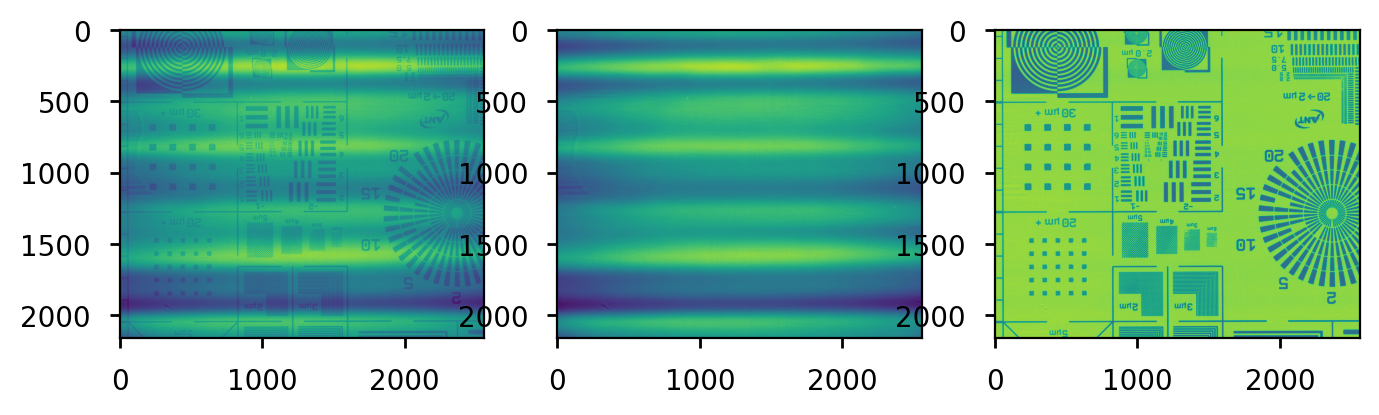

In [17]:
step = 10
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(data[step, :, :])
ax2.imshow(data_flat[step, :, :])
ax3.imshow(data_norm)

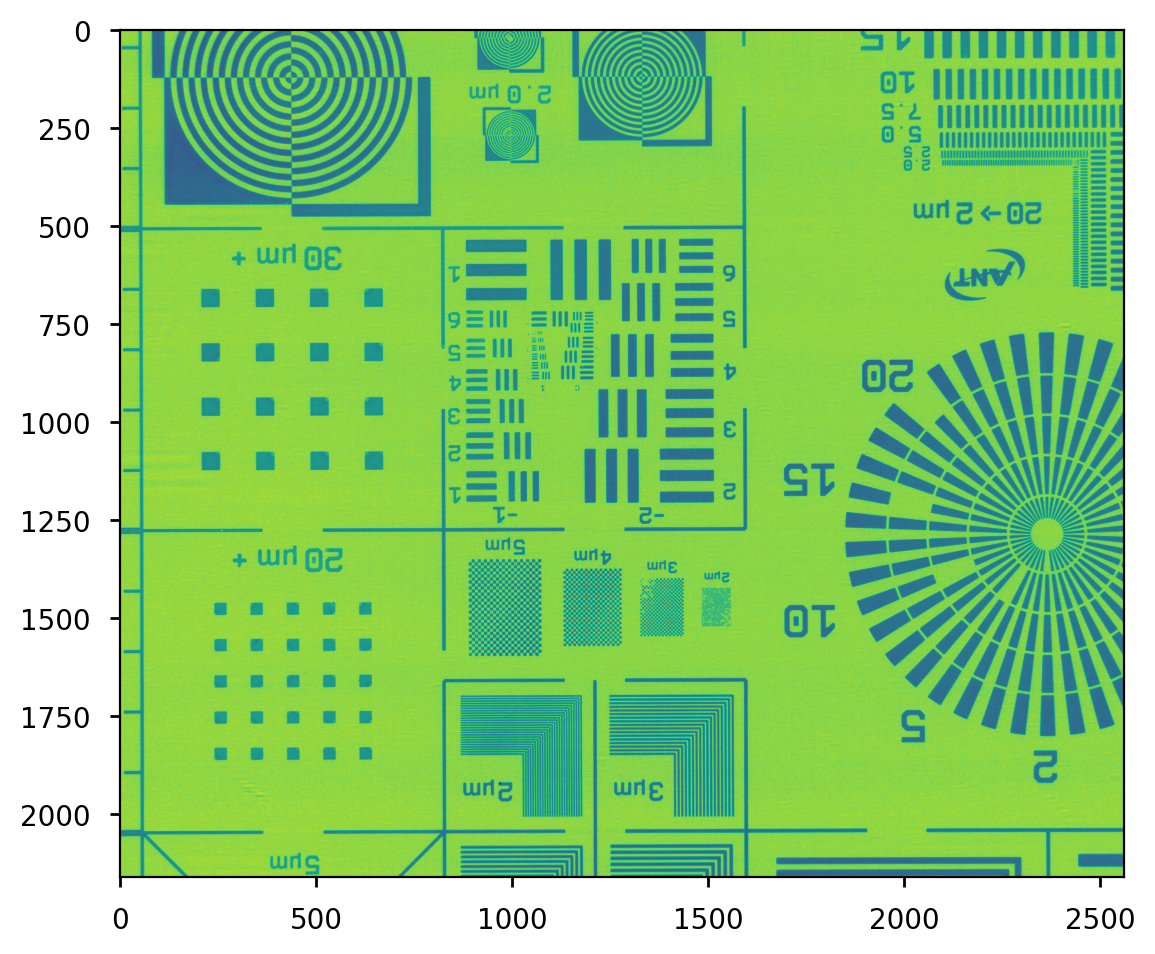

In [18]:
plt.imshow(data_norm)

In [21]:
data_norm

array([[0.99782151, 1.00300592, 1.00410769, ..., 0.99061092, 0.98506385,
        0.95389197],
       [1.00241458, 0.99718082, 1.00241507, ..., 0.9941869 , 0.98013889,
        0.96129676],
       [1.00215851, 1.00966014, 1.01147817, ..., 0.98626002, 0.98555976,
        0.95722009],
       ...,
       [0.99548767, 1.00425669, 1.00270708, ..., 1.        , 0.99417332,
        1.0051218 ],
       [0.98662116, 1.00437156, 1.00214305, ..., 0.99031166, 1.00583302,
        0.99778212],
       [1.00220764, 1.00242537, 0.99554854, ..., 0.99130795, 0.98356837,
        1.00830978]])

In [23]:
dxchange.write_tiff(data_norm[:], '/home/beatsbs/Data/IH/scratch/res_chart.tiff')

## Reload and process resolution chart detail

In [5]:
import tifffile

In [6]:
data_norm = tifffile.imread('/home/gianthk/Desktop/res_chart.tiff')

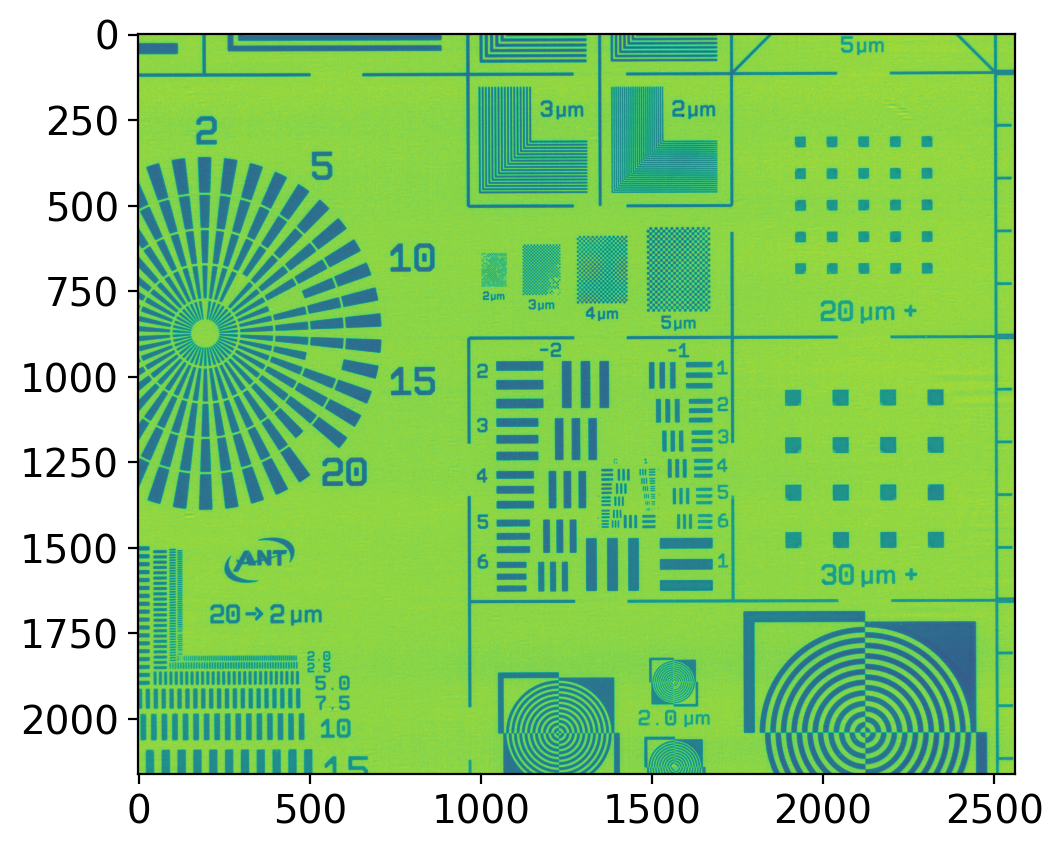

In [7]:
plt.imshow(np.flip(data_norm))

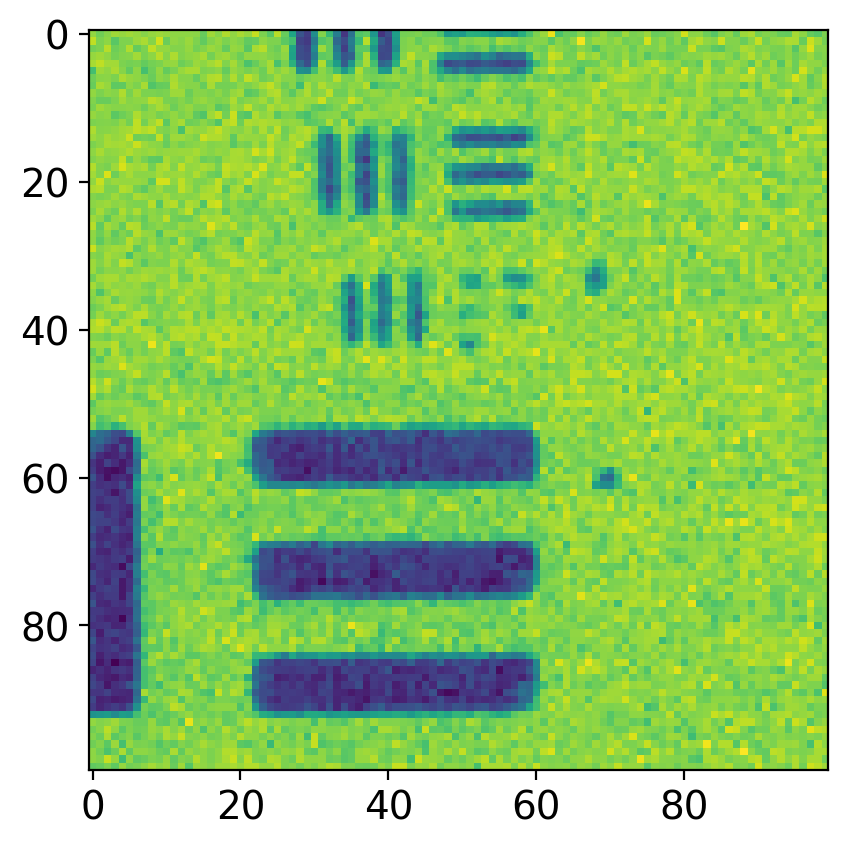

In [8]:
plt.imshow(np.flip(data_norm)[1350:1450, 1450:1550])

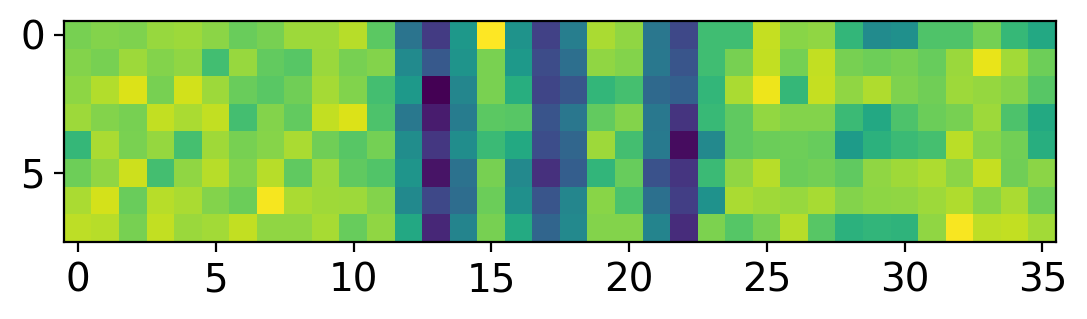

In [9]:
plt.imshow(np.flip(data_norm)[1384:1392, 1472:1508])

### Plot profile through res pattern

In [20]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 24}
matplotlib.rc('font', **font)

In [58]:
matplotlib.rcParams['figure.dpi'] = 200

In [10]:
data_norm_el6_series1 = np.flip(data_norm)[1384:1392, 1472:1508]
pixelsize = 0.65 # [um]

In [11]:
X_array = pixelsize * np.arange(0, data_norm_el6_series1.shape[1], 1)

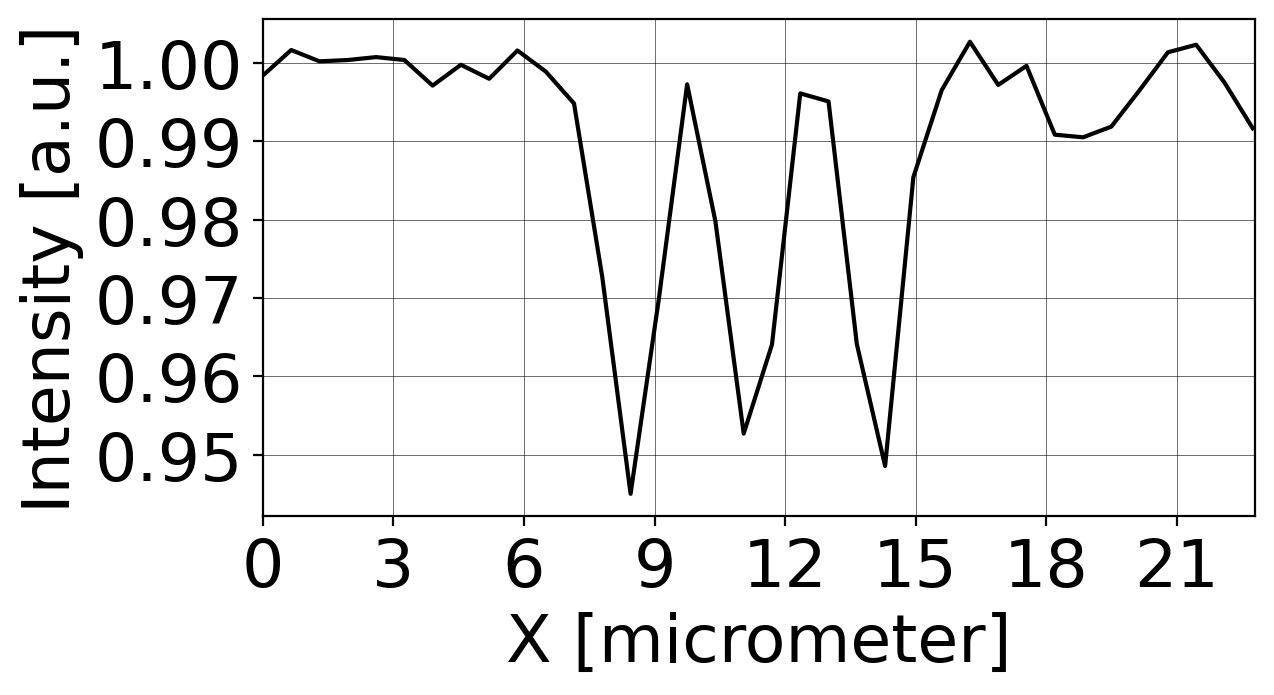

In [22]:
f, ax = plt.subplots()
ax.plot(X_array, np.mean(data_norm_el6_series1, axis=0), 'k')
plt.xticks(np.arange(0, 26, 3))
plt.yticks(np.arange(0.95, 1.001, 0.01))

plt.xlabel('X [micrometer]')
plt.ylabel('Intensity [a.u.]')
ax.set(xlim=(0, 22.8))
# profile = ax.plot((10*fit_result.best_fit-np.min(fit_result.best_fit))/np.max(fit_result.best_fit-np.min(fit_result.best_fit)), Y_array*1e-3 - fit_result.params['center'].value, color='b', linestyle='--', linewidth=1.5)
plt.grid(True, which="both", color='k', linewidth=0.2)
ax.set_aspect(180)
f.savefig("BEATS_resolution_pattern_el6_series1_Hprofile_2.jpg", bbox_inches='tight', dpi=600)